<hr style="border:2px solid #808080"> </hr>
<center><h1 style="color:#03122E;"> Álgebra Lineal Numérica IMT2111</h1></center>
<center><h1 style="color:#173F8A;"> Capítulo 2: Metodos iterativos basicos</h3></center>
<center><h1 style="color:#0176DE;"> Prof. Manuel A. Sánchez</h3></center>
<hr style="border:2px solid #808080"> </hr>

## **Tabla de contenidos**

1. [**Metodo iterativo de Jacobi - 2 implementaciones**](#Metodo-iterativo-de-Jacobi)
2. [**Metodo iterativo de Jacobi - diferencias finitas 1d**](#Ejemplo:-diferencias-finitas-en-1-dimension)
3. [**Metodo iterativo de Jacobi con aceleracion de Chebyshev**](#Metodo-iterativo-de-Jacobi-Chebyshev)


In [204]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
from matplotlib import cm
from matplotlib.patches import Polygon
display(HTML("""<style>.output {display: flex;align-items: center;text-align: center;}</style>"""))

## Metodos iterativos Basicos

Consideramos el problema de resolver el sistema lineal $Ax = b$. Usamos un metodo iterativo basico, correspondiente a un splitting del tipo

$$
    A = M - N
$$

para luego establecer la iteracion
$$
Mx^{(k)} = N x^{(k-1)}+ b
$$

## Metodo iterativo de Jacobi

Este metodo corresponde a separar
$$
A = M_{J} - N_{J},\quad M_{J} = D,\quad N_{J} = -(L+U)
$$

donde primero descomponemos $A = D + L + U$, con $D$ la diagonal de $A$, y $L$ y $U$ su parte estrictamente triangular inferior y superior, respectivamente.


In [205]:
def Jacobi_iteration(A, b, x0=None, tol=1e-8, MAXITER=100):
    n = b.size
    if x0 is None:
        x0 = np.zeros(n)
    x = x0.copy()
    # Splitting Jacobi
    D = np.diag(A); Dinv = 1.0/D ;L = np.tril(A, -1); U = np.triu(A,1)
    # Residual
    r = A.dot(x0) - b; res = np.linalg.norm(r,2)
    # Initialize
    xnew = np.zeros(n); niter = 0
    info = []; info.append([niter, res, x])
    
    while res > tol and niter<MAXITER:
        xnew = np.multiply(Dinv, (-(L+U).dot(x)) + b )
        x = xnew[:]
        niter +=1
        # residual
        r = A.dot(x) - b ;res = np.linalg.norm(r,2)
        info.append([niter, res, x])
    df = pd.DataFrame(info, columns = ['iteration', 'residual','solution']) 
    return df
        

## Ejemplo:
$$
A_1 = \begin{bmatrix}
1 &-0.5 \\
-0.5 & 1
\end{bmatrix}
$$

In [206]:
A1 = np.array([[1.0,-0.5],[-0.5,1.0]])
x = np.array([-1,2.0])
b = A1.dot(x)
info = Jacobi_iteration(A1,b)
print(info)

    iteration      residual                                   solution
0           0  3.201562e+00                                 [0.0, 0.0]
1           1  1.600781e+00                                [-2.0, 2.5]
2           2  8.003905e-01                               [-0.75, 1.5]
3           3  4.001953e-01                             [-1.25, 2.125]
4           4  2.000976e-01                           [-0.9375, 1.875]
5           5  1.000488e-01                         [-1.0625, 2.03125]
6           6  5.002441e-02                       [-0.984375, 1.96875]
7           7  2.501220e-02                     [-1.015625, 2.0078125]
8           8  1.250610e-02                   [-0.99609375, 1.9921875]
9           9  6.253051e-03                 [-1.00390625, 2.001953125]
10         10  3.126526e-03               [-0.9990234375, 1.998046875]
11         11  1.563263e-03             [-1.0009765625, 2.00048828125]
12         12  7.816314e-04           [-0.999755859375, 1.99951171875]
13    

In [207]:
def Jacobi_iteration2(A, b, x0=None, tol=1e-8, MAXITER=100):
    n = b.size
    if x0 is None:
        x0 = np.zeros(n)
    x = x0.copy()
    # Residual
    D = np.diag(A); Dinv = 1.0/D
    r = A.dot(x0) - b; res = np.linalg.norm(r,2)
    # Initialize
    niter = 0
    info = []; info.append([niter, res, x.copy()])
    
    while res > tol and niter<MAXITER:
        x -= np.multiply(Dinv, r )
        niter +=1
        # residual
        r = A.dot(x) - b ;res = np.linalg.norm(r,2)
        info.append([niter, res, x.copy()])
    df = pd.DataFrame(info, columns = ['iteration', 'residual','solution']) 
    return df

In [208]:
A1 = np.array([[1.0,-0.5],[-0.5,1.0]])
x = np.array([-1,2.0])
b = A1.dot(x)
info = Jacobi_iteration2(A1,b)
print(info)

    iteration      residual                                   solution
0           0  3.201562e+00                                 [0.0, 0.0]
1           1  1.600781e+00                                [-2.0, 2.5]
2           2  8.003905e-01                               [-0.75, 1.5]
3           3  4.001953e-01                             [-1.25, 2.125]
4           4  2.000976e-01                           [-0.9375, 1.875]
5           5  1.000488e-01                         [-1.0625, 2.03125]
6           6  5.002441e-02                       [-0.984375, 1.96875]
7           7  2.501220e-02                     [-1.015625, 2.0078125]
8           8  1.250610e-02                   [-0.99609375, 1.9921875]
9           9  6.253051e-03                 [-1.00390625, 2.001953125]
10         10  3.126526e-03               [-0.9990234375, 1.998046875]
11         11  1.563263e-03             [-1.0009765625, 2.00048828125]
12         12  7.816314e-04           [-0.999755859375, 1.99951171875]
13    

## Ejemplo: diferencias finitas en 1 dimension

Problema de Poisson en un Intervalo:
\begin{equation}
-u''(x) = f(x),\quad \mbox{ en }(0,1), \qquad u(0) = u(1) = 0. 
\end{equation}

Metodo de diferencias finitas centradas: Malla $\{x_j\},\,0\geq j\geq n$, $x_j = j \Delta x$, $\Delta x = 1/n$. Encontrar $u_j$, $1\leq j \leq n-1$, y con $u_0=u_n=0$, soluci\'on de
\begin{equation}
\frac{-u_{j+1}+2u_j-u_{j-1}}{\Delta x^{2}} = f(x_j), \qquad 1\leq j \leq n-1.
\end{equation}


In [209]:
def diff1dmesh(a=0, b=1, n=5):
    deltax = (b-a)/n
    x = np.zeros(n+1, dtype=np.float64)
    for j in range(n+1):
        x[j] = a+j*deltax
    return x
def diff1dPoissonmatrix(a=0, b=1, n=5):
    deltax = (b-a)/n
    A = 2.0/(deltax**2)*np.eye(n-1) -1.0/(deltax**2)*np.diag(np.ones(n-2),-1) - 1.0/(deltax**2)*np.diag(np.ones(n-2),1)
    return A

In [210]:
def solve_Poisson1d_differencias_finitas(f, n =20, ufun1D = lambda x: 0*x, solver='numpy'):
    # Grilla de diferencias finitas de n puntos
    X = diff1dmesh(n=n)
    # Matriz de diferencias finitas
    A1d = diff1dPoissonmatrix(n=n)
    # vector de diferencias finitas
    b1d = np.asarray([f(X[j]) for j in range(1,n) ])
    # Resolvermos el sistema lineal
    u = np.zeros(n+1, dtype=np.float64)
    if solver is 'numpy':
        u[1:n] = np.linalg.solve(A1d, b1d)
        return u, X
    elif solver is 'Jacobi':
        info = Jacobi_iteration(A1d,b1d, u[1:n])
        u[1:n] = info['solution'].iloc[-1]
        return u, X
    elif solver is 'Jacobi_diff1d':
        bb1d = np.asarray([f(X[j]) for j in range(n+1) ])
        h = X[1]-X[0]
        info = Jacobi_iteration_diff1d(bb1d, h,u)
        u = info['solution'].iloc[-1]
        return u, X
    

In [211]:
def plot_solucion_diferencias_finitas(X, u, ufun1d=None):
    fig, ax = plt.subplots(1,1, figsize=(6,5))
    ax.plot(X, u,color='C01', marker='o', linestyle='None', label='approximada')
    if ufun1d is not None:
        ax.plot(X, ufun1d(X), label='exacta')
    ax.legend(loc="best", fontsize=12)
    plt.show()

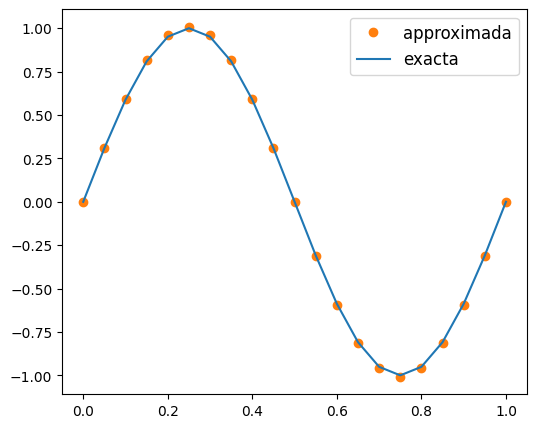

In [212]:
# Problema de Poisson: -u'' = f 
ufun1D = lambda x: np.sin(2*np.pi*x)
f = lambda x: 4*np.pi**2*np.sin(2*np.pi*x)
u, X = solve_Poisson1d_differencias_finitas(f, n =20, ufun1D =ufun1D, solver='numpy')
plot_solucion_diferencias_finitas(X, u, ufun1d=ufun1D)

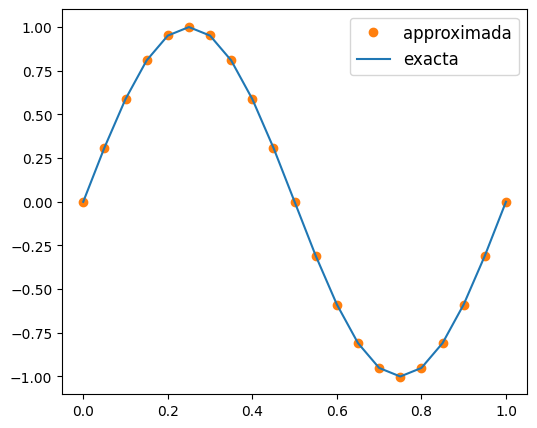

In [213]:
# Problema de Poisson: -u'' = f 
ufun1D = lambda x: np.sin(2*np.pi*x)
f = lambda x: 4*np.pi**2*np.sin(2*np.pi*x)
u, X = solve_Poisson1d_differencias_finitas(f, n =20, ufun1D =ufun1D, solver='Jacobi')
plot_solucion_diferencias_finitas(X, u, ufun1d=ufun1D)

In [214]:
def Jacobi_iteration_diff1d(b,h, u0=None, tol=1e-8, MAXITER=100):
    # A is assumed to be the finite difference matrix in 1d
    n = b.size
    if u0 is None:
        u0 = np.zeros(n)
    u = u0.copy()
    # Residual
    def residual_diff1d(uu,bb):
        r = np.zeros(n)
        for i in range(1,n-1):
            r[i] = (uu[i-1]-2.0*uu[i]+uu[i+1])/h**2 + bb[i]
        return np.linalg.norm(r,2)
    res = residual_diff1d(u,b)
    # Initialize
    niter = 0
    info = []; info.append([niter, res, u.copy()])
    while res > tol and niter<MAXITER:
        for i in range(1,n-1):
            u[i]  = 0.5*(u[i-1] + u[i+1]) + 0.5*h**2*b[i]
        niter +=1
        # residual
        res = residual_diff1d(u,b)
        info.append([niter, res, u.copy()])
    df = pd.DataFrame(info, columns = ['iteration', 'residual','solution']) 
    return df

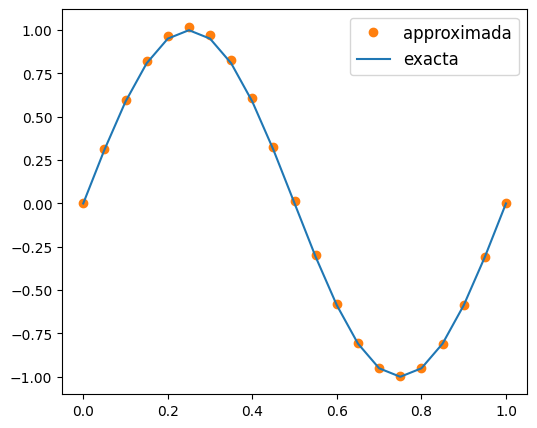

In [215]:
# Problema de Poisson: -u'' = f 
ufun1D = lambda x: np.sin(2*np.pi*x)
f = lambda x: 4*np.pi**2*np.sin(2*np.pi*x)
u, X = solve_Poisson1d_differencias_finitas(f, n =20, ufun1D =ufun1D, solver='Jacobi_diff1d')
plot_solucion_diferencias_finitas(X, u, ufun1d=ufun1D)

## Metodo iterativo de Jacobi Chebyshev

In [217]:
def Jacobi_Chebyshev(A,b,beta ,x0=None,tol=1e-8, MAXITER=100): #fixxx
    print("Jacobi accelerated by Chebyshev!")
    n = b.size
    # Splitting Jacobi
    D = np.diag(A); Dinv = 1.0/D ;L = np.tril(A, -1); U = np.triu(A,1)

    R = np.diag(Dinv)@(-(L+U))
    c = np.multiply(Dinv, b)
    if x0 is None:
        x0 = np.zeros(n)
    mu_m2 = 1
    mu_m1 = beta
    y_m2 = x0
    y_m1 = R @ x0 + c
    niter = 0
    
    r = A.dot(y_m1) - b ;res = np.linalg.norm(r,2)
    info = []; info.append([niter, res, y_m1.copy()])
    while res > tol and niter < MAXITER:
        mu = 1/(2/(beta*mu_m1) - 1/mu_m2) # 
        ym = ((2*mu)/(beta*mu_m1)) * (R@y_m1) - (mu/mu_m2)*y_m2 
        ym += ((2*mu)/(beta*mu_m1))*c
        y_m2 = y_m1.copy()
        y_m1 = ym.copy()
        mu_m2 = mu_m1
        mu_m1 = mu
        niter += 1
        r = A.dot(ym) - b ;res = np.linalg.norm(r,2)
        info.append([niter, res, ym.copy()])
        
    df = pd.DataFrame(info, columns = ['iteration', 'residual','solution']) 
    return df

In [227]:
A1 = np.array([[1.0,-0.5],[-0.5,1.0]])

X = np.linalg.eigh(A1)
print(X)
x = np.array([-1,2.0])
b = A1.dot(x)
infochev = Jacobi_Chebyshev(A1,b, beta =0.70710678)

print(infochev)

(array([0.5, 1.5]), array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]]))
Jacobi accelerated by Chebyshev!
   iteration      residual                                   solution
0          0  1.600781e+00                                [-2.0, 2.5]
1          1  3.581549e-09  [-0.9999999988813122, 1.9999999977626242]


In [ ]:
def chebyshev_acceleration(M, N, b, beta, x0=None, tol=1e-10, n_max=1000):
    R = np.linalg.solve(M, N)
    c = np.linalg.solve(M, b)
    if x0 is None:
        x0 = np.zeros(b.shape)
    mu_m2 = 1
    mu_m1 = beta
    y_m2 = x0
    y_m1 = R @ x0 + c
    idx = 0
    errors = []
    err = 1e10
    while idx < n_max and err > tol:
        mu = 1/(2/(beta*mu_m1) - 1/mu_m2)
        ym = ((2*mu)/(beta*mu_m1)) * (R@y_m1) - (mu/mu_m2)*y_m2 
        ym += ((2*mu)/(beta*mu_m1))*c
        y_m2 = y_m1.copy()
        y_m1 = ym.copy()
        mu_m2 = mu_m1
        mu_m1 = mu
        idx += 1
        errors.append(np.linalg.norm(b - (M-N)@ym))
        err = errors[-1]
    return ym, errors